<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Logística-com-Regularização" data-toc-modified-id="Regressão-Logística-com-Regularização-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Logística com Regularização</a></span><ul class="toc-item"><li><span><a href="#Lendo-e-Explorando-Dados" data-toc-modified-id="Lendo-e-Explorando-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo e Explorando Dados</a></span></li><li><span><a href="#Feature-Mapping" data-toc-modified-id="Feature-Mapping-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feature Mapping</a></span></li><li><span><a href="#Função-Custo-Regularizada" data-toc-modified-id="Função-Custo-Regularizada-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Função Custo Regularizada</a></span></li><li><span><a href="#Gradiente-Regularizado" data-toc-modified-id="Gradiente-Regularizado-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gradiente Regularizado</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Otimização</a></span></li><li><span><a href="#Avaliando-Modelo" data-toc-modified-id="Avaliando-Modelo-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Avaliando Modelo</a></span></li><li><span><a href="#Plotando-dados" data-toc-modified-id="Plotando-dados-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Plotando dados</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo a implementação, em Python, da segunda parte do exercício 2 do curso de Aprendizagem Automática da Universidade de Stanford. Concluída a primeira parte referente a um problema de Regressão Logística, neste ponto do aprendizado é proposto um problema de Regressão Logística com ```Regularização```.

Em outras palavras, é esperado um problema onde seja necessário definir uma função de um grau maior superior e, por consequência, curvilínia. A regularização atua de modo a dosar os pesos dos parâmetros relacionados aos graus elevados de ```x```, garantindo que o modelo não sofra de ```overfitting```. Para isto, novas equações de Custo e Gradiente deverão ser definidas levando em consideração uma penalização para tais termos. Vejamos.

## Regressão Logística com Regularização

No problema proposto, iremos implementar um algoritmo de Regressão Logística para Controle de Qualidade em uma fábrica de microchips com o intuito de verificar se peças são aprovadas ou não.

O dataset contém resultados de dois testes de cada um dos 118 microchips da cadeia de produção e, em sua última coluna, o resultado da aprovação ou não no Teste de Qualidade.

### Lendo e Explorando Dados

In [1]:
# Importando biblioteca
import numpy as np

dataset = np.loadtxt('ex2data2.txt', delimiter=',')
dataset[:5]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

In [2]:
# Dimensões do dataset
dataset.shape

(118, 3)

Até o momento, o problema está muito semelhante ao anterior, inclusive na quantidade de dados.

In [3]:
# Visualizando dados
import matplotlib.pyplot as plt
%matplotlib inline

positive_class = dataset[dataset[:, 2] == 1]
negative_class = dataset[dataset[:, 2] == 0]

In [4]:
# Verificando
positive_class[:10]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ],
       [-0.52477 ,  0.2098  ,  1.      ],
       [-0.39804 ,  0.034357,  1.      ],
       [-0.30588 , -0.19225 ,  1.      ],
       [ 0.016705, -0.40424 ,  1.      ],
       [ 0.13191 , -0.51389 ,  1.      ]])

In [5]:
# Verificando
negative_class[:10]

array([[0.18376 , 0.93348 , 0.      ],
       [0.22408 , 0.77997 , 0.      ],
       [0.29896 , 0.61915 , 0.      ],
       [0.50634 , 0.75804 , 0.      ],
       [0.61578 , 0.7288  , 0.      ],
       [0.60426 , 0.59722 , 0.      ],
       [0.76555 , 0.50219 , 0.      ],
       [0.92684 , 0.3633  , 0.      ],
       [0.82316 , 0.27558 , 0.      ],
       [0.96141 , 0.085526, 0.      ]])

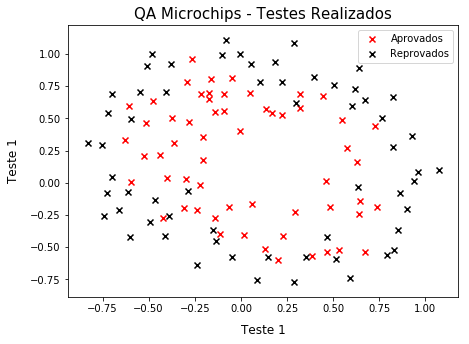

In [6]:
# Plotando dados
fig = plt.figure(figsize=(7, 5))
plt.scatter(positive_class[:, 0], positive_class[:, 1], marker='x', c='r')
plt.scatter(negative_class[:, 0], negative_class[:, 1], marker='x', c='k')
plt.title('QA Microchips - Testes Realizados', size=15)
plt.xlabel('Teste 1', size=12, labelpad=10)
plt.ylabel('Teste 1', size=12, labelpad=10)
plt.legend(['Aprovados', 'Reprovados'])
plt.show()

Aqui percebemos a diferença: para implementarmos uma regressão logística neste modelo, nossa função não poderá ser simplesmente linear. Os dados não são linearmente separavéis e, por conta disso, nossa função terá de ter um comportamento polinomial para alcançar os resultados pretendidos.

Para isto, vamos aplicar um procedimento chamado ```Map Feature``` com o objetivo de elevar o grau polinomial das nossas features (até a sexta potência). O cuidado que se tem de ter, como informado no bloco de introdução, é que modelos com alto grau polinomial tendem ao ```overfitting```, fator este combatido pela ```regularização```, a qual será implementada no decorrer deste exercício.

### Feature Mapping

Após algumas pesquisas, será necessário importar um módulo do scikit-learn para realizar este procedimento.

Fonte: [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [7]:
# Importando biblioteca e aplicando feature mapping
from sklearn.preprocessing import PolynomialFeatures

X = dataset[:, :2]
y = dataset[:, -1].reshape(X.shape[0], 1)

# Testando com um grau=2
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)
X2[:5]

array([[ 1.        ,  0.051267  ,  0.69956   ,  0.00262831,  0.03586434,
         0.48938419],
       [ 1.        , -0.092742  ,  0.68494   ,  0.00860108, -0.06352271,
         0.4691428 ],
       [ 1.        , -0.21371   ,  0.69225   ,  0.04567196, -0.14794075,
         0.47921006],
       [ 1.        , -0.375     ,  0.50219   ,  0.140625  , -0.18832125,
         0.2521948 ],
       [ 1.        , -0.51325   ,  0.46564   ,  0.26342556, -0.23898973,
         0.21682061]])

O que se esperava aconteceu: com o argumento = 2 dentro da inicialização da classe ```PolynomialFeatures()```, os dados foram transformados da seguinte forma:

    - coluna 0 = adicionado termo bias automaticamente (=1)
    - coluna 1 = antiga coluna 1, sem alterações
    - coluna 2 = antiga coluna 2, sem alterações
    - coluna 3 = x1^2 (coluna 1 ao quadrado)
    - coluna 4 = x1*x2 (coluna 1 * coluna 2)
    - coluna 5 = x2^2 (coluna 2 ao quadrado)

In [8]:
# Testando o exposto acima
amostra = X[0, :]
amostra

array([0.051267, 0.69956 ])

In [9]:
# Verificando
print(f'x1: {amostra[0]:>11}')
print(f'x2: {amostra[1]:>10}')
print(f'x1^2: {(amostra[0] ** 2):>15}')
print(f'x1*x2: {amostra[0] * amostra[1]:>11}')
print(f'x2^2: {(amostra[1] ** 2):>20}')

x1:    0.051267
x2:    0.69956
x1^2:  0.002628305289
x1*x2: 0.035864342519999995
x2^2:  0.48938419359999996


In [10]:
# Comparando com os dados obtidos no procedimento
print(f'Poly x1: {X2[0][1]:>11}')
print(f'Poly x2: {X2[0][2]:>10}')
print(f'Poly x1^2: {X2[0][3]:>15}')
print(f'Poly x1*x2: {X2[0][4]:>11}')
print(f'Poly x2^2: {X2[0][5]:>20}')

Poly x1:    0.051267
Poly x2:    0.69956
Poly x1^2:  0.002628305289
Poly x1*x2: 0.035864342519999995
Poly x2^2:  0.48938419359999996


É exatamente o que queremos, com a diferença no grau expadindo para a sexta potência!

In [11]:
# Expandindo para a sexta potência
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)

# Verificando
X[:5]

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01,
         2.62830529e-03,  3.58643425e-02,  4.89384194e-01,
         1.34745327e-04,  1.83865725e-03,  2.50892595e-02,
         3.42353606e-01,  6.90798869e-06,  9.42624411e-05,
         1.28625106e-03,  1.75514423e-02,  2.39496889e-01,
         3.54151856e-07,  4.83255257e-06,  6.59422333e-05,
         8.99809795e-04,  1.22782870e-02,  1.67542444e-01,
         1.81563032e-08,  2.47750473e-07,  3.38066048e-06,
         4.61305487e-05,  6.29470940e-04,  8.58939846e-03,
         1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01,
         8.60107856e-03, -6.35227055e-02,  4.69142804e-01,
        -7.97681228e-04,  5.89122275e-03, -4.35092419e-02,
         3.21334672e-01,  7.39785525e-05, -5.46363780e-04,
         4.03513411e-03, -2.98012201e-02,  2.20094970e-01,
        -6.86091891e-06,  5.06708697e-05, -3.74226408e-04,
         2.76382476e-03, -2.04120477e-02,  1.50751849e-01,
         6.36295342e-07, -4.69

In [12]:
# Novas dimensões
X.shape

(118, 28)

Sim, agora temos 28 features mapeadas.

### Função Custo Regularizada

\begin{equation*}
             J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)})-
                      (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})] + 
                      \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2 
\end{equation*}

O último termo diminui a magnitude dos parâmetros (repare que o termo bias theta0 não é afetado, visto que o somatório vai de j=1 até n)

Já tínhamos a função custo vetorizada implementada no exercício anterior. Antes de resgatá-la, precisamos também da função sigmoidal.

In [13]:
# Calculando função sigmoidal
def sigmoid(z):
    """Função responsável por calcular o resultado sigmoidal, dado o parâmetro z
    Input:
        z: parâmetro z definido por theta.T * x
    Output:
        g(z): função sigmoidal aplicada ao parâmetro z"""
    return 1 / (1 + np.exp(-z))

In [14]:
# Testando função custo
[m, n] = X.shape
theta_inicial = np.zeros((n, 1)) + 2
theta_inicial[:5]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [15]:
# Testando termo de regularização
(theta_inicial ** 2)[:5]

array([[4.],
       [4.],
       [4.],
       [4.],
       [4.]])

In [16]:
# Inicializando termos
theta_inicial = np.zeros((n, 1))
lamb = 1

# Calculando função hypothesis
z = X.dot(theta_inicial)
h = sigmoid(z)

# Definindo termos da função custo
termo1 = np.log(h).T.dot(-y)
termo2 = np.log(1 - h).T.dot(1 - y)
termo3 = theta_inicial.T.dot(theta_inicial)

# Função custo
J = ((termo1 - termo2) / m) + ((lamb/(2*m)) * termo3)

In [17]:
# Qual seria o custo para parâmetros zerados?
J

array([[0.69314718]])

Conforme o esperado, segundo o pdf do exerício. Vamos encapsular esse cálculo em uma função.

In [71]:
# Definindo função
def costFunction(theta, X, lamb):
    """
        Função responsável por computar o Custo com regularização para um problema
    de Regressão Logística.
    Input:
        - X: features
        - theta: parâmetros
        - lamb: termo de regularização
    Output:
        - J: função custo com regularização
    """
    # Inicializando termos
    [m, n] = X.shape

    # Calculando função hypothesis
    z = X.dot(theta_inicial)
    h = sigmoid(z)

    # Definindo termos da função custo
    termo1 = np.log(h).T.dot(-y)
    termo2 = np.log(1 - h).T.dot(1 - y)
    termo3 = theta_inicial.T.dot(theta_inicial)

    # Função custo
    J = (((termo1 - termo2) / m) + ((lamb/(2*m)) * termo3)).flatten()
    return J

In [72]:
# Testando
costFunction(theta_inicial, X, 1)

array([0.69314718])

### Gradiente Regularizado

O gradiente também muda:

A derivada parcial da função custo em relação a theta faz com que o termo elevado ao quadrado caia sobre a fração de lambda e elimine o multiplicador de m, restando apenas (lambda/m)*theta.

__Ponto Importante:__ a regularização ```não``` é aplicada ao termo bias (```theta0```)!

\begin{equation*}
    \frac{\partial J(\theta)}{\partial\theta_j} = 
        \begin{cases} 
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right)
                & \mbox{para } j\mbox{ = 0} \\
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right) +
            \frac{\lambda}{m}\theta_j &\mbox{para } j\mbox{ >= 1}
        \end{cases}
\end{equation*}                                       

Equações:

https://tex.stackexchange.com/questions/38868/big-parenthesis-in-an-equation
https://tex.stackexchange.com/questions/225523/how-to-write-partial-differential-equation-ex-dq-dt-ds-dt-with-real-partial-d

In [101]:
# Implementando gradiente sem regularização
grad0 = X.T.dot(h - y) / m

In [102]:
# Verificando
grad0

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02],
       [3.76648474e-02],
       [1.83559872e-02],
       [7.32393391e-03],
       [8.19244468e-03],
       [2.34764889e-02],
       [3.93486234e-02],
       [2.23923907e-03],
       [1.28600503e-02],
       [3.09593720e-03],
       [3.93028171e-02],
       [1.99707467e-02],
       [4.32983232e-03],
       [3.38643902e-03],
       [5.83822078e-03],
       [4.47629067e-03],
       [3.10079849e-02],
       [3.10312442e-02],
       [1.09740238e-03],
       [6.31570797e-03],
       [4.08503006e-04],
       [7.26504316e-03],
       [1.37646175e-03],
       [3.87936363e-02]])

In [103]:
# Adicionando regularização aos termos de 1 a n
grad0[1:] = grad0[1:] + theta_inicial[1:] * (lamb / m)

# Verificando
grad0

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02],
       [3.76648474e-02],
       [1.83559872e-02],
       [7.32393391e-03],
       [8.19244468e-03],
       [2.34764889e-02],
       [3.93486234e-02],
       [2.23923907e-03],
       [1.28600503e-02],
       [3.09593720e-03],
       [3.93028171e-02],
       [1.99707467e-02],
       [4.32983232e-03],
       [3.38643902e-03],
       [5.83822078e-03],
       [4.47629067e-03],
       [3.10079849e-02],
       [3.10312442e-02],
       [1.09740238e-03],
       [6.31570797e-03],
       [4.08503006e-04],
       [7.26504316e-03],
       [1.37646175e-03],
       [3.87936363e-02]])

Aparentemente, surtiu como o esperado. Entretando, não houve alterações nos valores devido a multiplicação por 0 em ```theta_inicial```.

In [104]:
# Verificando os 5 primeiros valores
grad0[:5]

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02]])

Os resultados bateram com o códito em Octave. Vamos encapsular a função gradiente.

In [136]:
# Implementando função
def gradientRegularized(X, y, theta, l):
    """ Função responsável pela implementação do Gradiente Descendente
    com Regularização
    Input:
        - X: features;
        - y: labels;
        - theta: parâmetros;
        - l: termo de regularização lambda
    Output:
        - best_theta: parâmetros que melhor se enquadram ao modelo"""
    
    [m, n] = X.shape

    # Calculando hypothesis
    z = X.dot(theta)
    h = sigmoid(z)

    # Aplicando termo sem regularização (bias)
    grad = X.T.dot(h - y) / m

    # Aplicando regularização
    grad[1:] = grad[1:] + ((theta[1:] * l) / m)

    # Atualizando parâmetros
    return grad

In [137]:
# Chamando função
l = 1
grad = gradientRegularized(X, y, theta_inicial, l)
grad[:5]

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02]])

In [138]:
# Modificando função custo para contemplar o gradiente
def newCostFunction(theta, X, y, lamb):
    """
        Função responsável por computar o Custo com regularização para um problema
    de Regressão Logística.
    Input:
        - theta: parâmetros
        - X: features
        - y: labels
        - lamb: termo de regularização
    Output:
        - J: função custo com regularização
        - grad: gradiente para esta iteração
    """
    # Inicializando termos
    [m, n] = X.shape

    # Calculando função hypothesis
    z = X.dot(theta)
    h = sigmoid(z)

    # Definindo termos da função custo
    termo1 = np.log(h).T.dot(-y)
    termo2 = np.log(1 - h).T.dot(1 - y)
    termo3 = theta.T.dot(theta)

    # Função custo
    J = (((termo1 - termo2) / m) + ((lamb/(2*m)) * termo3)).flatten()
    
    # Gradiente
    grad = gradientRegularized(X, y, theta, lamb)
    
    return J, grad

In [139]:
# Testando
J, grad = newCostFunction(theta_inicial, X, y, lamb=1)
print(f'Custo: {J}\n\nGradiente (5 primeiros):\n{grad[:5]}')

Custo: [0.69314718]

Gradiente (5 primeiros):
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


Testando com outros parâmetros...

In [140]:
# Modificando theta
theta_teste = np.ones((n, 1))
theta_teste[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [141]:
# Testando
J, grad = newCostFunction(theta_teste, X, y, lamb=10)
print(f'Custo: {J}\n\nGradiente (5 primeiros):\n{grad[:5]}')

Custo: [3.20688221]

Gradiente (5 primeiros):
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


O custo não mudou!? Algo está errado! O erro foi descoberto (só serviu para a ocasião, pois como foi corrigida a função, o valor acima provavelmente estará correto). Os parâmetros dentro da função ```costFunction``` e ```newCostFunction``` estavam apontando para a variável ```theta_inicial``` dentro do escopo da função, e não para a variável ```theta```, definida nos argumentos. 

In [142]:
# Verificando novamente
J, grad = newCostFunction(theta_teste, X, y, lamb=10)
print(f'Custo: {J}\n\nGradiente (5 primeiros):\n{grad[:5]}')

Custo: [3.20688221]

Gradiente (5 primeiros):
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


Esperava-se um valor de 3.16 e, com 3.20 como resultado, acredito que estamos caminhando bem. Os gradientes retornaram de acordo com o esperado.

### Otimização

Agora que conseguimos definir corretamente as funções de custo e gradiente, vamos aplicar métodos automáticos para minimização da função e retorno dos melhores parâmetros. Já fizemos isso anteriormente através dos métodos da biblioteca ```scipy.optimize```.

In [143]:
# Importando bibliotecas
import scipy.optimize, scipy.special

In [144]:
# Realizando alguns testes
theta = np.zeros((n, 1))
l = 1
result = scipy.optimize.fmin(newCostFunction, x0=theta, args=(X, y, l),
                             maxiter=500, full_output=True)

ValueError: operands could not be broadcast together with shapes (27,118) (27,) 

In [128]:
# Verificando resultadog
grad[1:] = grad[1:] + theta[1:] * (l / m)

In [145]:
grad.shape

(28, 1)

In [146]:
theta.shape

(28, 1)

In [147]:
(theta[1:] * l(l / m)).shape

(27, 1)

Algo não está dando certo. Provavalmente devemos tentar um outro algoritmo de otimização.

In [148]:
# Testando minimize

result = scipy.optimize.minimize(newCostFunction, theta, args=(X, y, l),  
                                 method='BFGS', options={"maxiter":500, "disp":True} )

ValueError: operands could not be broadcast together with shapes (27,118) (27,) 

In [151]:
# Redefinindo função custo
def newCostFunction(theta, X, y, lamb):
    """
        Função responsável por computar o Custo com regularização para um problema
    de Regressão Logística.
    Input:
        - theta: parâmetros
        - X: features
        - y: labels
        - lamb: termo de regularização
    Output:
        - J: função custo com regularização
        - grad: gradiente para esta iteração
    """
    # Inicializando termos
    [m, n] = X.shape

    # Calculando função hypothesis
    z = X.dot(theta)
    h = sigmoid(z)

    # Definindo termos da função custo
    termo1 = np.log(h).T.dot(-y)
    termo2 = np.log(1 - h).T.dot(1 - y)
    termo3 = theta.T.dot(theta)

    # Função custo
    J = (((termo1 - termo2) / m) + ((lamb/(2*m)) * termo3)).flatten()
    
    # Gradiente
    #grad = gradientRegularized(X, y, theta, lamb)
    
    return J

In [154]:
# Realizando alguns testes
result = scipy.optimize.minimize(newCostFunction, theta, args=(X, y, l),  
                                 method='BFGS', options={"maxiter":500, "disp":True})

Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 46
         Function evaluations: 1410
         Gradient evaluations: 47


In [162]:
# Avaliando retorno
result

      fun: 0.5351602589460671
 hess_inv: array([[ 9.28075271e+00,  3.68470894e-01,  6.08947297e-01,
        -6.96496161e+00, -4.47693224e-01, -1.03002009e+01,
         1.53389547e+00, -2.80497174e+00, -1.24086998e+00,
         6.03293795e-01, -4.73375902e+00,  1.97909578e+00,
        -4.45988859e+00,  3.03925116e-01, -4.67492554e+00,
         3.71514419e-01, -9.30175751e-01,  2.36084763e-01,
        -1.76397402e+00, -1.07964018e+00,  1.92997058e+00,
        -2.86925315e+00,  1.41032861e+00, -1.90657688e+00,
         9.15247370e-01, -2.22212595e+00,  1.37246037e-01,
        -5.47158457e-01],
       [ 3.68470894e-01,  1.27134732e+01,  4.22893770e+00,
        -5.51672182e+00, -6.87856493e+00,  2.10882604e+00,
         2.17635621e+00,  1.73829025e-01,  2.38611071e+00,
        -2.69172776e+00, -4.32624523e+00, -3.20863412e-01,
         3.60081662e-01, -1.55047547e+00, -1.19700403e+00,
        -4.81324611e-01,  2.03033403e-01,  1.23436560e+00,
        -6.75434290e-01,  7.53727384e-01, -2.607

In [158]:
# Retornando o que interessa
min_J = result.fun
best_theta = result.x

In [161]:
# Comunicando
print(f'Custo mínimo: {min_J}')

print(f'\nMelhores parâmetros:\n{best_theta}')

Custo mínimo: 0.5351602589460671

Melhores parâmetros:
[ 1.14216767  0.60159662  1.16719539 -1.87133836 -0.91585481 -1.27009658
  0.12635729 -0.36845912 -0.34493712 -0.17359468 -1.42386113 -0.04897014
 -0.60654097 -0.26932561 -1.16298461 -0.24354141 -0.20689062 -0.0433884
 -0.28027313 -0.28676042 -0.46905386 -1.03650761  0.02900044 -0.29266117
  0.01716365 -0.32900564 -0.13798811 -0.93193372]


### Avaliando Modelo

Após minimizarmos a função custo e obtermos os melhores parâmetros. Vamos realizar predições.

In [170]:
# Realizando predições
h = sigmoid(X.dot(best_theta))
threshold = 0.5
predictions = ((h >= 0.5) * 1).reshape((m, 1))

In [174]:
# Verificando
print(f'Predições (5 primeiras): \n{predictions[:5]}')
print(f'\nLabels: (5 primeiros): \n{y[:5]}')

Predições (5 primeiras): 
[[1]
 [1]
 [1]
 [1]
 [1]]

Labels: (5 primeiros): 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [175]:
# Quantidade de erros
errors = (predictions != y) * 1
sum(errors)

array([22])

In [178]:
# Acurácia
acc = 1 - (sum(errors) / y.shape[0])
print(f'Acurácia do modelo: {acc}')

Acurácia do modelo: [0.81355932]


No treinamento em Octave obtivemos uma Acurácia de ```83.1%``` aproximadamente.

### Plotando dados

Com a ajuda de códigos encontrados no github de um dos alunos deste curso, vamos plotar a fronteira de decisão obtida.

In [180]:
def mapFeature(X1, X2):
    degrees = 6
    out = np.ones((X1.shape[0], 1))
    
    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = X1 ** (i - j)
            term2 = X2 ** (j)
            term = (term1 * term2).reshape((term1.shape[0], 1))
            out = np.hstack((out, term))
    return out

In [193]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        mapped = mapFeature(np.array([u[i]]), np.array([v[j]]))
        z[i, j] = mapped.dot(best_theta)
z = z.transpose()
u, v = np.meshgrid(u, v)

In [240]:
u.shape

(50,)

In [241]:
v.shape

(50, 50)

In [242]:
z.shape

(50, 50)

Text(0.15,1.4,'Lamda 1.0')

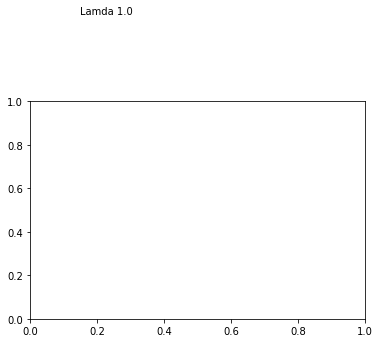

In [198]:
plt.text(.15, 1.4, 'Lamda %.1f' %l)

ValueError: Contour levels must be increasing

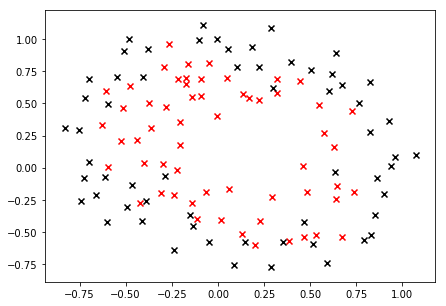

In [195]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(positive_class[:, 0], positive_class[:, 1], marker='x', c='r')
plt.scatter(negative_class[:, 0], negative_class[:, 1], marker='x', c='k')
plt.contour(u, v, z, [0, 0])
plt.title('QA Microchips - Testes Realizados', size=15)
plt.xlabel('Teste 1', size=12, labelpad=10)
plt.ylabel('Teste 1', size=12, labelpad=10)
plt.legend(['Aprovados', 'Reprovados', 'Fronteira de Decisão'])
plt.show()

Vamos tentar na raça. A equação que temos é dada por:

\begin{equation*}
    h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_1^{2}+\theta_4x_1x_2+\theta_5x_2^{2}
    + ... + \theta_{26}x_1x_2^{5}+\theta_{27}x_2^{6}
\end{equation*}

Para tal, com os parâmetros em mãos, precisamos utilizar o mapeamento de features utilizado no começo do problema.

In [208]:
# Criando vetor teste
u = np.linspace(-1, 1.5, 50) # Limites mínimos e máximos
u

array([-1.      , -0.94898 , -0.897959, -0.846939, -0.795918, -0.744898, -0.693878, -0.642857, -0.591837, -0.540816, -0.489796, -0.438776, -0.387755, -0.336735, -0.285714, -0.234694, -0.183673,
       -0.132653, -0.081633, -0.030612,  0.020408,  0.071429,  0.122449,  0.173469,  0.22449 ,  0.27551 ,  0.326531,  0.377551,  0.428571,  0.479592,  0.530612,  0.581633,  0.632653,  0.683673,
        0.734694,  0.785714,  0.836735,  0.887755,  0.938776,  0.989796,  1.040816,  1.091837,  1.142857,  1.193878,  1.244898,  1.295918,  1.346939,  1.397959,  1.44898 ,  1.5     ])

In [210]:
# Ajuda em plots de contorno
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N* automatically-chosen levels.
    
    ::
    
      contour(Z,V)
      contour(X,Y,Z,V)
    
    draw contour li

In [211]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [264]:
xx = np.linspace(x_min, x_max, 50)
yy = np.linspace(y_min, y_max, 50)

In [265]:
for i in range(len(xx)):
    for j in range(len(yy)):
        mapped = mapFeature(np.array([xx[i]]), np.array([yy[j]]))
        z[i, j] = mapped.dot(best_theta)
z = z.transpose()
xx, yy = np.meshgrid(xx, yy)

In [266]:
xx.shape

(50, 50)

In [267]:
yy.shape

(50, 50)

In [268]:
z.shape

(50, 50)

In [269]:
xx.ravel().shape

(2500,)

In [253]:
poly = PolynomialFeatures(6)
X_test = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])

In [254]:
# Verificando
X_test.shape

(2500, 28)

In [223]:
# Original
X.shape

(118, 28)

In [255]:
# Calculando Z
Z = sigmoid(X_test.dot(best_theta))
Z = Z.reshape(xx.shape)

In [256]:
Z.shape

(50, 50)

In [257]:
xx.shape

(50, 50)

In [258]:
yy.shape

(50, 50)

ValueError: Contour levels must be increasing

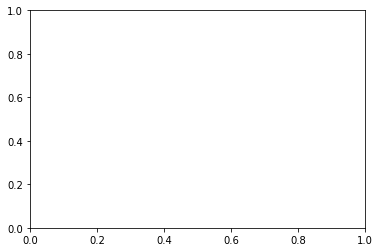

In [272]:
plt.contour(xx, yy, z, [1, 0])

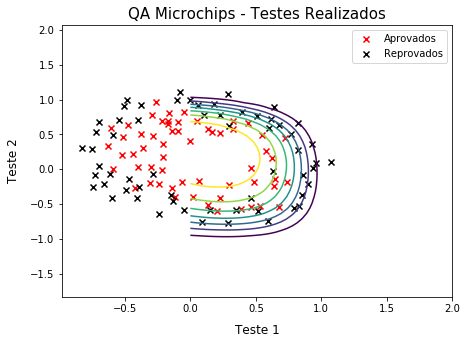

In [273]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(positive_class[:, 0], positive_class[:, 1], marker='x', c='r')
plt.scatter(negative_class[:, 0], negative_class[:, 1], marker='x', c='k')
plt.contour(xx, yy, Z)
plt.title('QA Microchips - Testes Realizados', size=15)
plt.xlabel('Teste 1', size=12, labelpad=10)
plt.ylabel('Teste 2', size=12, labelpad=10)
plt.legend(['Aprovados', 'Reprovados', 'Fronteira de Decisão'])
plt.show()